<a href="https://colab.research.google.com/github/VariableSoporte/ClasePerceptron/blob/main/crear_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Perceptrón**

Es un clasificador binario que toma decisiones basadas en una combinación lineal de sus entradas.

##**Componentes Principales**
*   **Entradas:** Los datos o características que recibe el modelo
*   **Pesos:** Coeficiente que determina la importancia de cada entrada. Un peso alto define una entrada que influye mucho más en el resultado.
*   **Suma Ponderada:** Es el cálculo interno donde se multiplican las entradas por sus pesos y se suman.
*   **Función de Activación:** Una regla lógica que decide si la neurona se "dispara" (arroja un 1) o permanece apagada (arroja un 0)

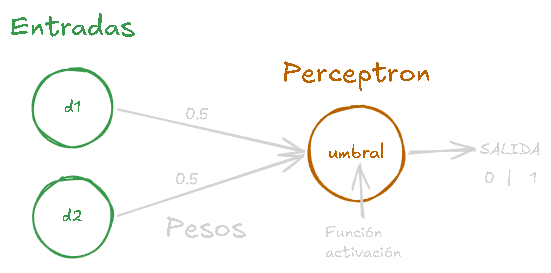



In [ ]:
import numpy as np

In [ ]:
#Creamos una compuerta logica AND
#Tendremos 4 combinaciones posibles para dicha entrada
entradas = np.array([[0,0],[0,1],[1,0],[1,1]])

#Las salidas o etiquetas deben ser las correctas para que empieze a aprender
respuestas = np.array([0, 0, 0, 1])

#creamos los pesos de cada entrada
pesos = np.array([0.5, 0.5])

#creamos el humbral que nos permite decidir
umbral = 0.7  #Si la suma ponderada es mayor a 0.7, el resultado es 1

In [ ]:
def perceptron(input_data, w, t):
  #realiza suma ponderada
  suma = np.dot(input_data, w)
  #funcion activacion tipo escalon
  return 1 if suma > t else 0

In [ ]:
#Prueba de perceptron
print("Resultados del Perceptron: ")
for i in range(len(entradas)):
  resultado = perceptron(entradas[i], pesos, umbral)
  print(f"Entradas: {entradas[i]} -> Predicción: {resultado} (Real: {respuestas[i]})")

# **Aprendizaje Automatico Perceptron**
Para realizar un perceptrón que aprenda de forma autónoma nos basamos en el mismo principio. Sin embargo lo vamos a complementar con las siguientes partes:

$$w_{nuevo} = w_{actual} + (\eta \cdot \text{error} \cdot x)$$

*   **w:** Son los pesos
*   **η (eta):** Es la tasa de aprendizaje, este valor controla qué tan brusco es el cambio.
*   **Error:** Es la diferencia entre el valor real y el calculado por el perceptrón.
*   **x:** Es el valor de la entrada.


In [ ]:
import numpy as np

In [ ]:
#Datos de entrenamiento
entradas = np.array([[0,0],[0,1],[1,0],[1,1]])
respuestas_reales = np.array([0, 0, 0, 1])

Es importante iniciar valores de forma aleatoria para evitar un problema de simetria. Todas las neuronas de una capa podrian tener cálculos identicos, todas recivirian el mismo ajuste y al no tener diversidad la red no aprendería características complejas ya que todas las partes serian una copia de la misma.

Al tener valores aleatorios cada neurona comienza en un punto diferente y permite explorar distintas soluciones.

In [ ]:
#1 Iniciamos valores aleatorios
pesos = np.random.uniform(-1, 1, 2) #Dos pesos al azar
bias = np.random.uniform(-1, 1) #Sesgo al azar
tasa_aprendizaje = 0.1
epocas = 10 #La cantidad de veces que se realizara un entrenamiento

print(f"Pesos iniciales: {pesos}\n")

In [ ]:
#2 Entrenamiento
for epoca in range(epocas):
  error_total = 0
  for i in range (len(entradas)):
    #Prediccion (Suma ponderada + Activación)
    suma_z = np.dot(entradas[i], pesos) + bias
    prediccion = 1 if suma_z > 0 else 0

    #Calcular error
    error = respuestas_reales[i] - prediccion
    error_total += abs(error)

    #3. ajustar pesos y bias
    pesos += tasa_aprendizaje * error * entradas[i]
    bias += tasa_aprendizaje * error
  print(f"epoca {epoca+1}: Cantidad errores = {error_total}")
  if (error_total == 0):
    print("Perceptron entrenado")
    break

In [ ]:
#4 validacion final
print("Prueba final:")
for i in range(len(entradas)):
  z = np.dot(entradas[i], pesos) + bias
  res = 1 if z>0 else 0
  print(f"Entrada: {entradas[i]} -> Predicción: {res}")

In [ ]:
print(f"Pesos: {pesos} | bias: {bias}")

# **Gráfica de elementos**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Datos de entrenamiento (Compuerta AND)
entradas = np.array([[0,0], [0,1], [1,0], [1,1]])
respuestas_reales = np.array([0, 0, 0, 1])

# Recorremos las respuestas, y depende a su valor lo pintamos
colores = ['red' if y == 0 else 'blue' for y in respuestas_reales]

# Inicialización
np.random.seed(42) # Para que los resultados sean reproducibles
pesos = np.random.uniform(-1, 1, 2)
bias = np.random.uniform(-1, 1)
tasa_aprendizaje = 0.01
epocas = 200 # Más épocas para ver mejor el movimiento

print(f"Pesos iniciales: {pesos}\nBias inicial: {bias}\n")

# Para almacenar la evolución de la línea
line_history = []

# Configurar la gráfica
fig, ax = plt.subplots(figsize=(6, 6))  #fig es el lienzo y ax son los axes
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel("Entrada 1")
ax.set_ylabel("Entrada 2")
ax.set_title("Evolución del Perceptrón (Compuerta AND)")
ax.grid(True)

# Graficar los puntos (fijos)
ax.scatter(entradas[:, 0], entradas[:, 1], c=colores, s=100, edgecolors='k')

# Objeto de línea que se actualizará
line, = ax.plot([], [], 'g--', label='Frontera de Decisión')
ax.legend()

# 3. Ciclo de Entrenamiento
for epoca in range(epocas):
    error_total = 0

    # Calcular la línea de decisión para esta época
    if pesos[1] != 0: # Evitar división por cero
        # x2 = (-w1/w2) * x1 - (bias/w2)
        x_line = np.array([-0.5, 1.5]) # Rango para x1
        y_line = (-pesos[0] / pesos[1]) * x_line - (bias / pesos[1])

        """
        print(f"\nÉpoca {epoca+1}")
        print(f"Pesos actuales: {pesos}")
        print(f"Bias actual: {bias}")
        print(f"x_line: {x_line}")
        print(f"y_line: {y_line}")
        """

        line_history.append((x_line, y_line))
    else: # Si w2 es cero, la línea es vertical (x1 = -bias/w1)
        x_line = np.array([-bias / pesos[0], -bias / pesos[0]])
        y_line = np.array([-0.5, 1.5])
        line_history.append((x_line, y_line))

    for i in range(len(entradas)):
        # Predicción
        suma_z = np.dot(entradas[i], pesos) + bias
        prediccion = 1 if suma_z > 0 else 0

        # Calcular error
        error = respuestas_reales[i] - prediccion
        error_total += abs(error)

        # Ajuste de Pesos y Bias
        pesos += tasa_aprendizaje * error * entradas[i]
        bias += tasa_aprendizaje * error

    # print(f"Época {epoca+1}: Errores = {error_total}, Pesos = {pesos}, Bias = {bias}")
    if error_total == 0:
        print(f"\n¡El perceptrón ha aprendido en la época {epoca+1}!")
        break

# Función para animar la línea
def animate(frame):
    current_x_line, current_y_line = line_history[frame]

    """
    print(f"\nFRAME {frame}")
    print(f"x que se dibuja: {current_x_line}")
    print(f"y que se dibuja: {current_y_line}")
    """

    line.set_data(current_x_line, current_y_line)
    ax.set_title(f"Época {frame+1}: Frontera de Decisión (Error Total: {abs(respuestas_reales - np.array([1 if np.dot(entradas[j], pesos) + bias > 0 else 0 for j in range(len(entradas))])).sum() if frame >= len(line_history)-1 else 'Calculando...'})")
    return line,

# Crear la animación
ani = FuncAnimation(fig, animate, frames=len(line_history), interval=100, blit=True)

# Mostrar la animación
HTML(ani.to_jshtml())

In [ ]:
#Probar el modelo
def predecir(x):
    z = np.dot(x, pesos) + bias
    return 1 if z > 0 else 0
prueba = [-0.25, 1.5] #Realizan pruebas dentro del modelo
print(f"entrada: {prueba} -> respuesta del modelo: {predecir(prueba)}")